In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\BigML_Dataset.csv",encoding='latin')
df.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
0,http://www.amazon.com/How-Bartender-Bartending...,How to be a Bartender: Get a Bartending Job Wi...,Dave Allred,9.99,NaN,171.0,"In his revolutionary new book, Dave Allred (Th...",249.0,NaN,English,Enabled,Not Enabled,Enabled,23.0,4.9
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâs anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,http://www.amazon.com/Double-Your-Tips-Jerry-M...,How to Double Your Tips [Kindle Edition],Jerry Minchey,2.99,NaN,36.0,"How to Double Your Tips (For every waitress, w...",98.0,Stony River Media,English,Enabled,Not Enabled,Enabled,6.0,4.5
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6


In [6]:
df.drop(['url','save','publisher','description','title','author','language'], axis='columns', inplace=True)
df.head()

,price,pages,size,text_to_speech,x_ray,lending,customer_reviews,stars
0,9.99,171.0,249.0,Enabled,Not Enabled,Enabled,23.0,4.9
1,2.00,258.0,1427.0,Enabled,Enabled,Enabled,80.0,4.7
2,9.87,288.0,5643.0,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,2.99,36.0,98.0,Enabled,Not Enabled,Enabled,6.0,4.5
4,5.99,400.0,647.0,Enabled,Not Enabled,Not Enabled,59.0,3.6


In [7]:
len(df[df['stars']==5])

2901

In [8]:
df['dummy'] = df['stars'].apply(lambda x: 1 if x==5 else 0)
df.head()

,price,pages,size,text_to_speech,x_ray,lending,customer_reviews,stars,dummy
0,9.99,171.0,249.0,Enabled,Not Enabled,Enabled,23.0,4.9,0
1,2.00,258.0,1427.0,Enabled,Enabled,Enabled,80.0,4.7,0
2,9.87,288.0,5643.0,Enabled,Not Enabled,Not Enabled,32.0,4.2,0
3,2.99,36.0,98.0,Enabled,Not Enabled,Enabled,6.0,4.5,0
4,5.99,400.0,647.0,Enabled,Not Enabled,Not Enabled,59.0,3.6,0


In [9]:
df = pd.get_dummies(df)
df.head()

,price,pages,size,customer_reviews,stars,dummy,text_to_speech_Enabled,text_to_speech_Not enabled,x_ray_Enabled,x_ray_Not Enabled,lending_Enabled,lending_Not Enabled
0,9.99,171.0,249.0,23.0,4.9,0,1,0,0,1,1,0
1,2.00,258.0,1427.0,80.0,4.7,0,1,0,1,0,1,0
2,9.87,288.0,5643.0,32.0,4.2,0,1,0,0,1,0,1
3,2.99,36.0,98.0,6.0,4.5,0,1,0,0,1,1,0
4,5.99,400.0,647.0,59.0,3.6,0,1,0,0,1,0,1


In [10]:
df.drop(['text_to_speech_Not enabled','x_ray_Not Enabled','lending_Not Enabled'], axis='columns', inplace=True)
df.head()

,price,pages,size,customer_reviews,stars,dummy,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,9.99,171.0,249.0,23.0,4.9,0,1,0,1
1,2.00,258.0,1427.0,80.0,4.7,0,1,1,1
2,9.87,288.0,5643.0,32.0,4.2,0,1,0,0
3,2.99,36.0,98.0,6.0,4.5,0,1,0,1
4,5.99,400.0,647.0,59.0,3.6,0,1,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49197 entries, 0 to 49196
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   48642 non-null  float64
 1   pages                   48987 non-null  float64
 2   size                    48155 non-null  float64
 3   customer_reviews        47751 non-null  float64
 4   stars                   47752 non-null  float64
 5   dummy                   49197 non-null  int64  
 6   text_to_speech_Enabled  49197 non-null  uint8  
 7   x_ray_Enabled           49197 non-null  uint8  
 8   lending_Enabled         49197 non-null  uint8  
dtypes: float64(5), int64(1), uint8(3)
memory usage: 2.4 MB


In [12]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
price,48642.0,8.242983,12.867139,0.0,2.99,6.6,9.99,1200.0
pages,48987.0,293.684284,285.217646,1.0,163.00,268.0,360.00,10221.0
size,48155.0,2470.728624,12379.529979,1.0,427.00,749.0,1812.00,618307.0
customer_reviews,47751.0,94.231828,319.180387,1.0,11.00,29.0,78.00,19723.0
stars,47752.0,4.281297,0.507142,1.0,4.00,4.4,4.60,5.0
dummy,49197.0,0.058967,0.235565,0.0,0.00,0.0,0.00,1.0
text_to_speech_Enabled,49197.0,0.899791,0.300282,0.0,1.00,1.0,1.00,1.0
x_ray_Enabled,49197.0,0.362400,0.480698,0.0,0.00,0.0,1.00,1.0
lending_Enabled,49197.0,0.525378,0.499361,0.0,0.00,1.0,1.00,1.0


In [13]:
df.shape

(49197, 9)

<Figure size 1440x864 with 0 Axes>

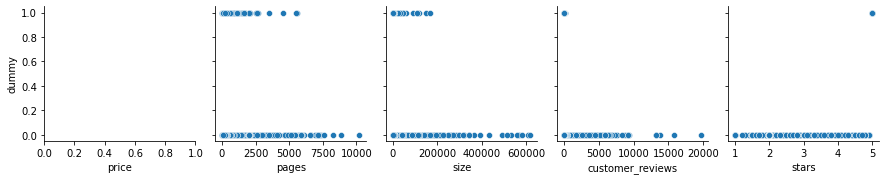

In [14]:
plt.figure(figsize=(20, 12))
sns.pairplot(df,x_vars=['price','pages','size','customer_reviews','stars'],y_vars=['dummy'])

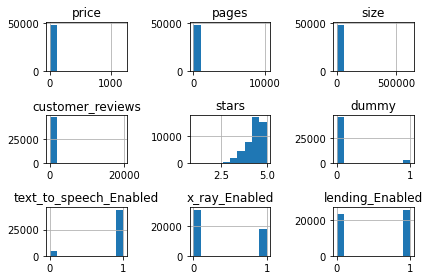

In [15]:
df.hist()
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='customer_reviews'>

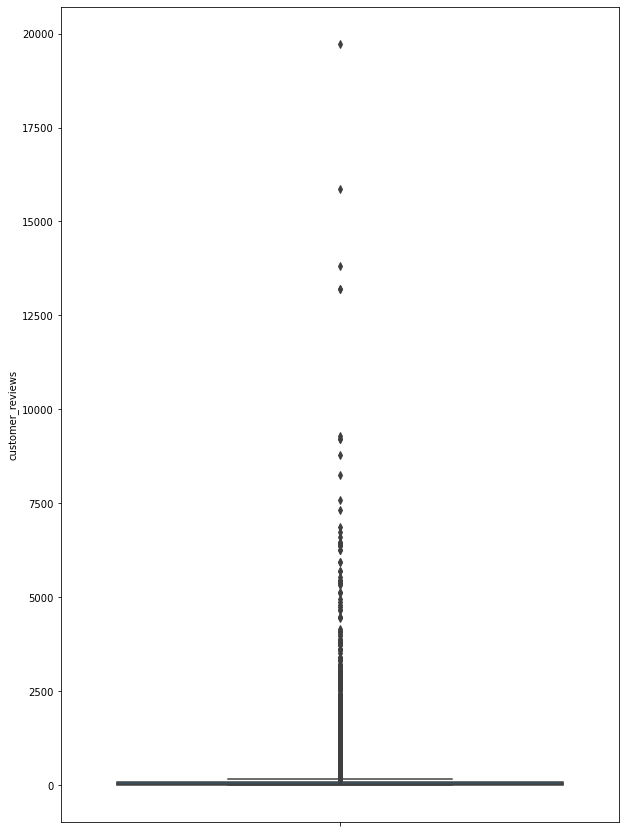

In [16]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df,y='customer_reviews')

<AxesSubplot:ylabel='size'>

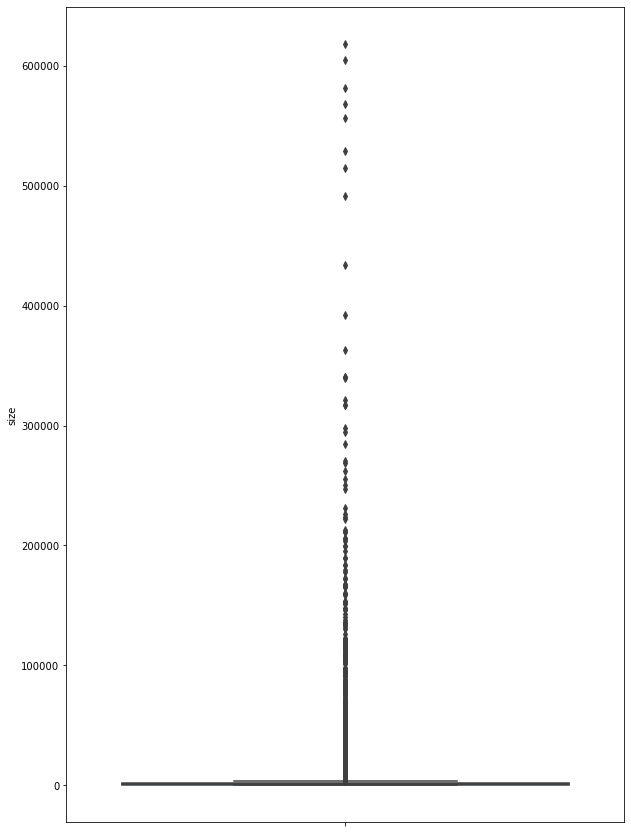

In [17]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df,y='size')

<AxesSubplot:ylabel='price'>

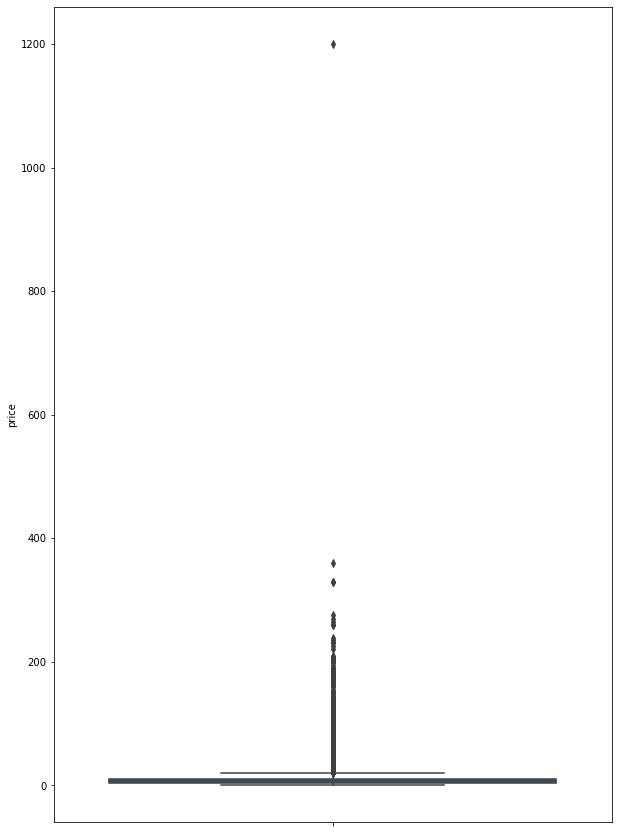

In [18]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df,y='price')

<AxesSubplot:ylabel='pages'>

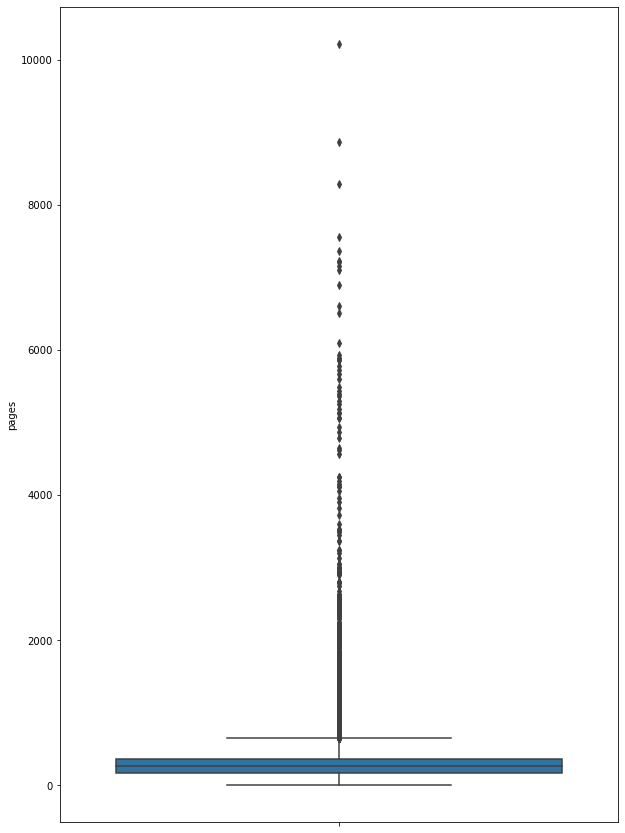

In [19]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df,y='pages')

<AxesSubplot:>

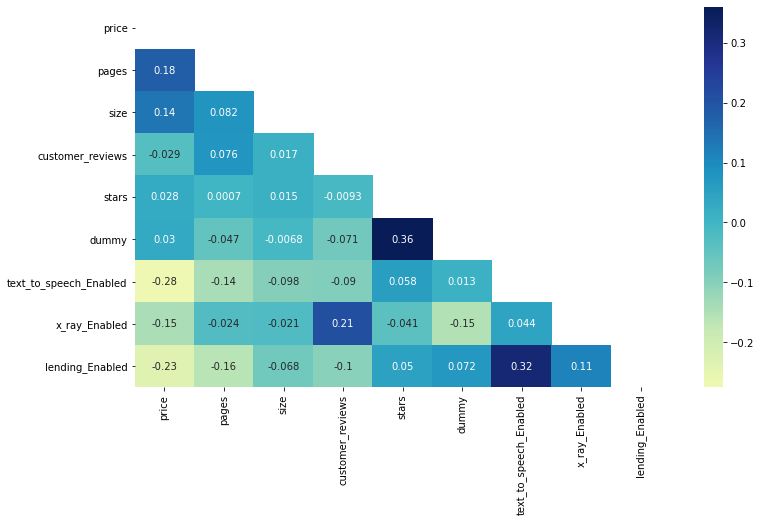

In [20]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(corr, mask = mask, annot=True, center=0, cmap="YlGnBu")

In [21]:
df.columns

Index(['price', 'pages', 'size', 'customer_reviews', 'stars', 'dummy',
       'text_to_speech_Enabled', 'x_ray_Enabled', 'lending_Enabled'],
      dtype='object')

In [11]:
train,test = train_test_split(df, test_size=0.2,stratify = df['dummy'])
X_cols = ['price', 'pages', 'size', 'customer_reviews', 'text_to_speech_Enabled', 'x_ray_Enabled', 'lending_Enabled']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['dummy'], test['dummy']
num_cols = ['price', 'pages', 'size', 'customer_reviews']
train_median = X_train[num_cols].median()
X_train[num_cols]=X_train[num_cols].fillna(train_median)
X_test[num_cols]=X_test[num_cols].fillna(train_median)

In [23]:
regs = [RandomForestClassifier(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier()]
for reg in regs:
    print("Regressão: ", reg.__class__.__name__)
    reg = reg
    reg.fit(X_train, y_train)
    print("Score: ", reg.score(X_test, y_test))
    y_proba_test = reg.predict_proba(X_test)
    roc_test = roc_auc_score(y_test, y_proba_test[:, 1])
    print("ROC AUC: ", roc_test)
    print("="*80)

Regressão:  RandomForestClassifier
Score:  0.9422764227642276
ROC AUC:  0.8973101772547851
Regressão:  GaussianNB
Score:  0.7071138211382114
ROC AUC:  0.8666517092425711
Regressão:  LogisticRegression
Score:  0.9410569105691057
ROC AUC:  0.9206343561480599
Regressão:  DecisionTreeClassifier
Score:  0.9159552845528456
ROC AUC:  0.6409326357339689


In [24]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['Atributo', 'Importancia'])
clf.sort_values('Importancia', ascending=False).head()

,Atributo,Importancia
2,size,0.292478
3,customer_reviews,0.290801
1,pages,0.245841
0,price,0.144375
6,lending_Enabled,0.013280


In [25]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['Atributo', 'Importancia'])
clf.sort_values('Importancia', ascending=False).head()

,Atributo,Importancia
3,customer_reviews,0.303644
2,size,0.266520
1,pages,0.249933
0,price,0.149805
5,x_ray_Enabled,0.015418


In [26]:
from platform import python_version
import pandas
print(python_version())
print((pandas.__version__))

3.8.5
1.1.3


ROC AUC de Teste é DecisionTreeClassifier é 86.23%


[Text(558.0, 453.0, 'customer_reviews <= 3.5\ngini = 0.111\nsamples = 39357\nvalue = [37036, 2321]'),
 Text(279.0, 271.8, 'customer_reviews <= 1.5\ngini = 0.487\nsamples = 3262\nvalue = [1893, 1369]'),
 Text(139.5, 90.59999999999997, 'gini = 0.486\nsamples = 1089\nvalue = [453, 636]'),
 Text(418.5, 90.59999999999997, 'gini = 0.447\nsamples = 2173\nvalue = [1440, 733]'),
 Text(837.0, 271.8, 'customer_reviews <= 7.5\ngini = 0.051\nsamples = 36095\nvalue = [35143, 952]'),
 Text(697.5, 90.59999999999997, 'gini = 0.238\nsamples = 3743\nvalue = [3225, 518]'),
 Text(976.5, 90.59999999999997, 'gini = 0.026\nsamples = 32352\nvalue = [31918, 434]')]

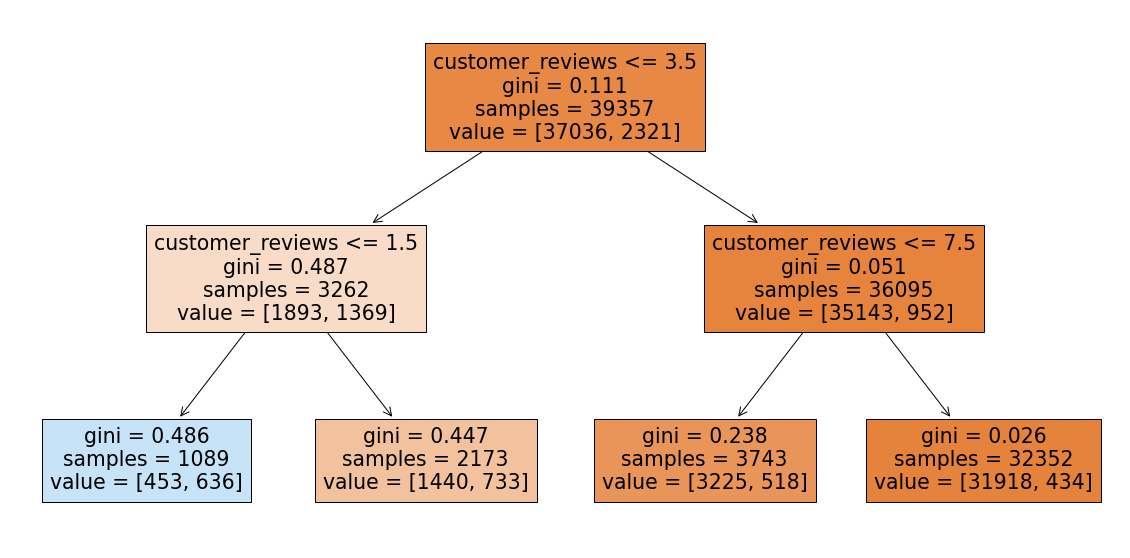

In [27]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train) 
y_proba = clf.predict_proba(X_test)
roc_auc=roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC de Teste é {clf.__class__.__name__} é {roc_auc*100:.2f}%')

plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=X_train.columns,filled=True)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9260
           1       0.52      0.24      0.33       580

    accuracy                           0.94      9840
   macro avg       0.74      0.61      0.65      9840
weighted avg       0.93      0.94      0.93      9840



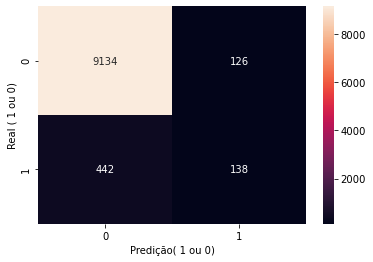

In [28]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82      9260
           1       0.16      0.93      0.27       580

    accuracy                           0.71      9840
   macro avg       0.58      0.81      0.54      9840
weighted avg       0.94      0.71      0.78      9840



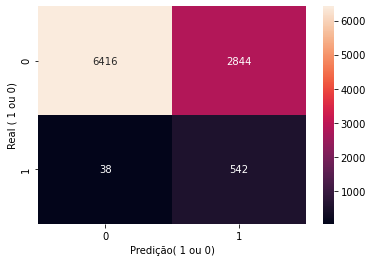

In [29]:
reg = GaussianNB()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

In [23]:
pr>0.05

array([ True, False,  True, ..., False, False, False])

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      9260
           1       0.19      0.92      0.31       580

    accuracy                           0.76      9840
   macro avg       0.59      0.84      0.58      9840
weighted avg       0.95      0.76      0.82      9840

0.912222201534222


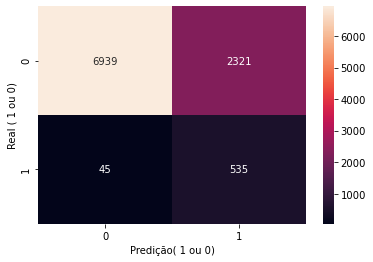

In [24]:
threshold = 0.05
reg = LogisticRegression()
reg.fit(X_train, y_train)
#y_pred=reg.predict(X_test)
y_proba_test = reg.predict_proba(X_test)
y_proba_test= y_proba_test[:, 1]
y_pred = y_proba_test>threshold
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))
y_proba_test = reg.predict_proba(X_test)
roc_test = roc_auc_score(y_test, y_proba_test[:, 1])
print(roc_test)

(array([6892.,  623.,  541.,  343.,  375.,  259.,  281.,  256.,  240.,
          30.]),
 array([0.        , 0.04434602, 0.08869204, 0.13303806, 0.17738408,
        0.2217301 , 0.26607612, 0.31042214, 0.35476816, 0.39911418,
        0.4434602 ]),
 <BarContainer object of 10 artists>)

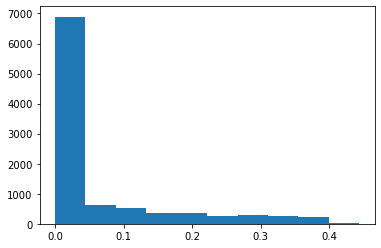

In [13]:
plt.hist(y_proba_test[:, 1])

(array([ 580.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9260.]),
 array([0.00150967, 0.01203272, 0.02255577, 0.03307881, 0.04360186,
        0.05412491, 0.06464796, 0.075171  , 0.08569405, 0.0962171 ,
        0.10674015]),
 <BarContainer object of 10 artists>)

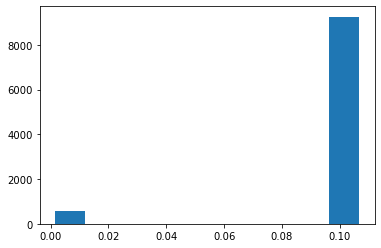

In [18]:
pr = y_proba_test[:, 1]
plt.hist(pr[y_test.values])

In [21]:
y_train.value_counts()


0    37036
1     2321
Name: dummy, dtype: int64

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9260
           1       0.30      0.32      0.31       580

    accuracy                           0.91      9840
   macro avg       0.63      0.64      0.63      9840
weighted avg       0.92      0.91      0.92      9840



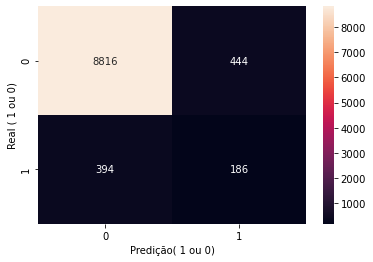

In [31]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

In [ ]:
=================================================================================================================================

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer = CountVectorizer(min_df=1,stop_words='english')
words = vectorizer.fit_transform(df['description'])
svd = TruncatedSVD(n_components = 2)
lsa = svd.fit_transform(words)

In [35]:
dictionary = vectorizer.get_feature_names()
dictionary[:5]

['00', '000', '00000', '0000000', '0000001010011010â']

In [36]:
encoding_matrix = pd.DataFrame(svd.components_,index=['Topic 1','Topic 2']).T
encoding_matrix["terms"] = dictionary
encoding_matrix['abs_topic_1'] = np.abs(encoding_matrix['Topic 1'])
encoding_matrix['abs_topic_2'] = np.abs(encoding_matrix['Topic 2'])
for i in ['0','1','2','3','4','5','6','7','8','9','è','ä','é','ã','ç','â','æ','ï','å']:
    encoding_matrix = encoding_matrix[~encoding_matrix.terms.str.contains(i)]
encoding_matrix.sort_values('abs_topic_1',ascending=False)

,Topic 1,Topic 2,terms,abs_topic_1,abs_topic_2
60563,1.982421e-01,3.002019e-02,images,1.982421e-01,3.002019e-02
20113,1.649086e-01,2.530483e-02,button,1.649086e-01,2.530483e-02
49331,1.127505e-01,1.877158e-02,function,1.127505e-01,1.877158e-02
6379,1.122925e-01,-2.220088e-02,amazon,1.122925e-01,2.220088e-02
67871,1.064610e-01,-3.474809e-02,kindle,1.064610e-01,3.474809e-02
...,...,...,...,...,...
70167,9.512140e-11,-4.061981e-09,lasciarsi,9.512140e-11,4.061981e-09
61439,9.512140e-11,-4.061981e-09,incredibile,9.512140e-11,4.061981e-09
61398,9.512140e-11,-4.061981e-09,incontreranno,9.512140e-11,4.061981e-09
104518,9.512140e-11,-4.061981e-09,ritrovarsi,9.512140e-11,4.061981e-09


In [37]:
encoding_matrix.sort_values('abs_topic_2',ascending=False)

,Topic 1,Topic 2,terms,abs_topic_1,abs_topic_2
17039,7.011953e-02,-4.865181e-01,book,7.011953e-02,4.865181e-01
71891,1.815551e-02,-2.497507e-01,life,1.815551e-02,2.497507e-01
84869,6.267377e-02,-2.207631e-01,new,6.267377e-02,2.207631e-01
123651,1.698285e-02,-1.544951e-01,time,1.698285e-02,1.544951e-01
135511,1.454154e-02,-1.362339e-01,world,1.454154e-02,1.362339e-01
...,...,...,...,...,...
61398,9.512140e-11,-4.061981e-09,incontreranno,9.512140e-11,4.061981e-09
61439,9.512140e-11,-4.061981e-09,incredibile,9.512140e-11,4.061981e-09
70167,9.512140e-11,-4.061981e-09,lasciarsi,9.512140e-11,4.061981e-09
104518,9.512140e-11,-4.061981e-09,ritrovarsi,9.512140e-11,4.061981e-09


In [ ]:
================================================================================================================================